## Marine Debris Dataset for Object Detection in Planetscope Imagery
### Link - https://cmr.earthdata.nasa.gov/search/concepts/C2781412735-MLHUB.html

## Data Exploration

In [12]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

#### 1. Loading sample data

CRS: EPSG:4326
Bounds: BoundingBox(left=-87.626953125, bottom=15.950766025306109, right=-87.6214599609375, top=15.95604762305055)
Shape: (256, 256)


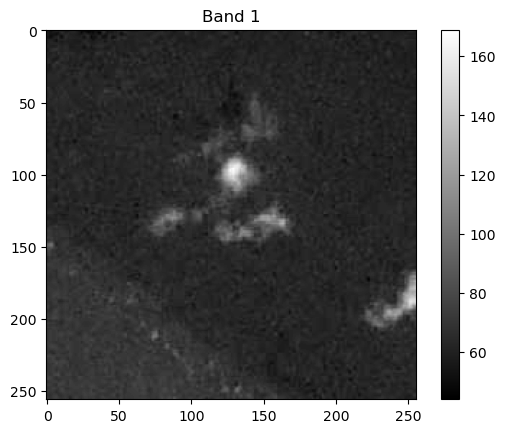

In [ ]:
# Load a GeoTIFF file
tif_path = "20161008_153104_0e3a_16816-29825-16.tif"
with rasterio.open(tif_path) as src:
    print("CRS:", src.crs)  # Coordinate Reference System
    print("Bounds:", src.bounds)  # Bounding box of the raster
    print("Shape:", src.shape)  # (rows, columns)

    # Read and visualize the first band
    band1 = src.read(1)  # Reading the first band
    plt.imshow(band1, cmap='gray')
    plt.title("Band 1")
    plt.colorbar()
    plt.show()


#### 2. Geo JSON file

  earth_science_event tag_status                                label  \
0       Marine Debris        yes  shapefile86005_20181022T155353_100a   
1       Marine Debris        yes  shapefile86004_20181022T155353_100a   
2       Marine Debris        yes  shapefile86003_20181022T155353_100a   
3       Marine Debris        yes  shapefile85947_20160928T153233_0e16   

   metadata           name  labels  \
0  {'': ''}  marine_debris       1   
1  {'': ''}  marine_debris       1   
2  {'': ''}  marine_debris       1   
3  {'': ''}  marine_debris       1   

                                            geometry  
0  POLYGON ((-87.62424 15.95104, -87.62336 15.951...  
1  POLYGON ((-87.62548 15.95182, -87.62431 15.951...  
2  POLYGON ((-87.62675 15.95378, -87.62675 15.952...  
3  POLYGON ((-87.62391 15.95149, -87.62695 15.951...  
CRS: EPSG:4326
Columns: Index(['earth_science_event', 'tag_status', 'label', 'metadata', 'name',
       'labels', 'geometry'],
      dtype='object')


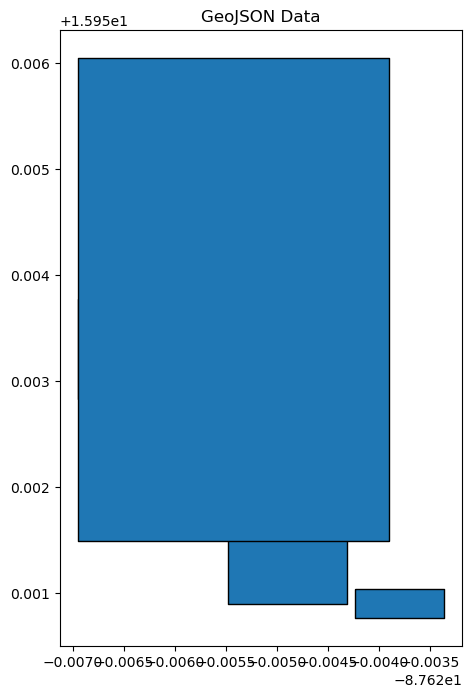

In [2]:
import geopandas as gpd

# Load GeoJSON file
geojson_path = "20161008_153104_0e3a_16816-29825-16.geojson"
gdf = gpd.read_file(geojson_path)

# Inspect the data
print(gdf.head())  # View first few rows
print("CRS:", gdf.crs)  # Check coordinate reference system
print("Columns:", gdf.columns)  # List columns

# Plot the geometries
gdf.plot(figsize=(10, 8), edgecolor='black')
plt.title("GeoJSON Data")
plt.show()


#### 3. Overlay

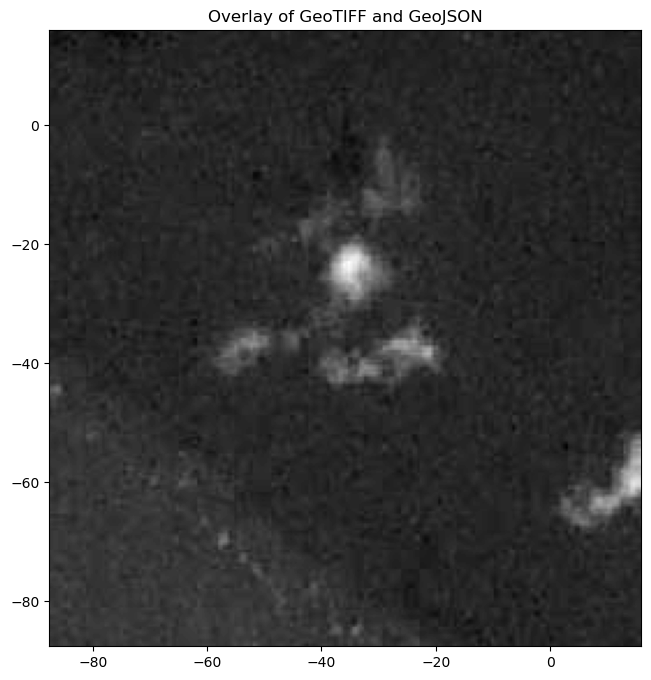

In [6]:
gdf = gdf.to_crs(src.crs)  # Reproject GeoJSON to match GeoTIFF CRS
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(band1, cmap='gray', extent=src.bounds)
gdf.plot(ax=ax, facecolor='none', edgecolor='red')
plt.title("Overlay of GeoTIFF and GeoJSON")
plt.show()

#### 4. Multiple Bands

In [8]:
import rasterio

# Check the number of bands
with rasterio.open("20161008_153104_0e3a_16816-29825-16.tif") as src:
    print("Number of bands:", src.count)


Number of bands: 3


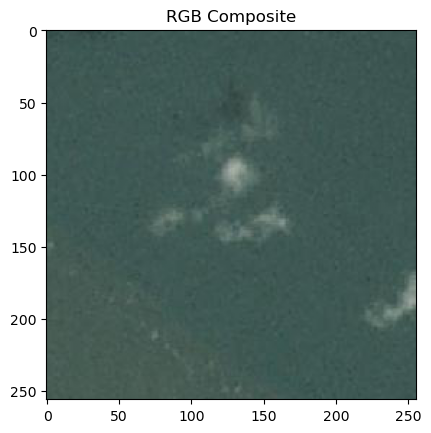

In [13]:
with rasterio.open("20161008_153104_0e3a_16816-29825-16.tif") as src:
    red = src.read(1)  # First band
    green = src.read(2)  # Second band
    blue = src.read(3)  # Third band

    # Visualize as RGB composite
    rgb = np.stack((red, green, blue), axis=-1)
    plt.imshow(rgb / 255.0)  # Normalize pixel values
    plt.title("RGB Composite")
    plt.show()


#### 5. Extract Data by Region

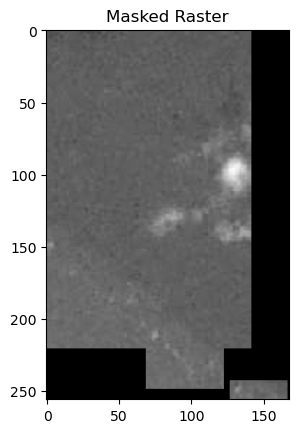

In [14]:
from rasterio.mask import mask

# Mask raster using GeoJSON geometries
geometries = [feature["geometry"] for feature in gdf.__geo_interface__["features"]]
with rasterio.open(tif_path) as src:
    out_image, out_transform = mask(src, geometries, crop=True)

# Visualize masked area
plt.imshow(out_image[0], cmap='gray')
plt.title("Masked Raster")
plt.show()


#### 6. Metadata

In [15]:
with rasterio.open("20161008_153104_0e3a_16816-29825-16.tif") as src:
    print(src.meta)  # Metadata of the file


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 256, 'height': 256, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(2.1457672119140625e-05, 0.0, -87.626953125,
       0.0, -2.0631241189221494e-05, 15.95604762305055)}


#### Data Augmentation